In [161]:
import pandas as pd 
import seaborn as sns
import matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [162]:
# File to Load
data_filepath = ("vgsales_clean.csv")
video_game_data = pd.read_csv(data_filepath)

In [163]:
#Read Video Games Sales Data File and store into Pandas DataFrames
print(video_game_data.shape)
video_game_data.head()

(16291, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [164]:
Data_filepath= pd.DataFrame(video_game_data)
Data_filepath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [165]:
total_platform_year = pd.DataFrame(video_game_data.groupby('Year')['Global_Sales'].sum().reset_index())
print(total_platform_year.shape)
print(total_platform_year)



(39, 2)
      Year  Global_Sales
0   1980.0         11.38
1   1981.0         35.77
2   1982.0         28.86
3   1983.0         16.79
4   1984.0         50.36
5   1985.0         53.94
6   1986.0         37.07
7   1987.0         21.74
8   1988.0         47.22
9   1989.0         73.45
10  1990.0         49.39
11  1991.0         32.23
12  1992.0         76.16
13  1993.0         45.98
14  1994.0         79.17
15  1995.0         88.11
16  1996.0        199.15
17  1997.0        200.98
18  1998.0        256.47
19  1999.0        251.27
20  2000.0        201.56
21  2001.0        331.47
22  2002.0        395.52
23  2003.0        357.85
24  2004.0        414.01
25  2005.0        458.51
26  2006.0        521.04
27  2007.0        609.92
28  2008.0        678.90
29  2009.0        667.30
30  2010.0        600.29
31  2011.0        515.80
32  2012.0        363.49
33  2013.0        368.11
34  2014.0        337.03
35  2015.0        264.44
36  2016.0         70.90
37  2017.0          0.05
38  2020.0       

In [166]:
# Filter for a specific range of years
start_year = 1980
end_year = 2005
filtered_sales = total_platform_year[(total_platform_year['Year'] >= start_year) & (total_platform_year['Year'] <= end_year)]



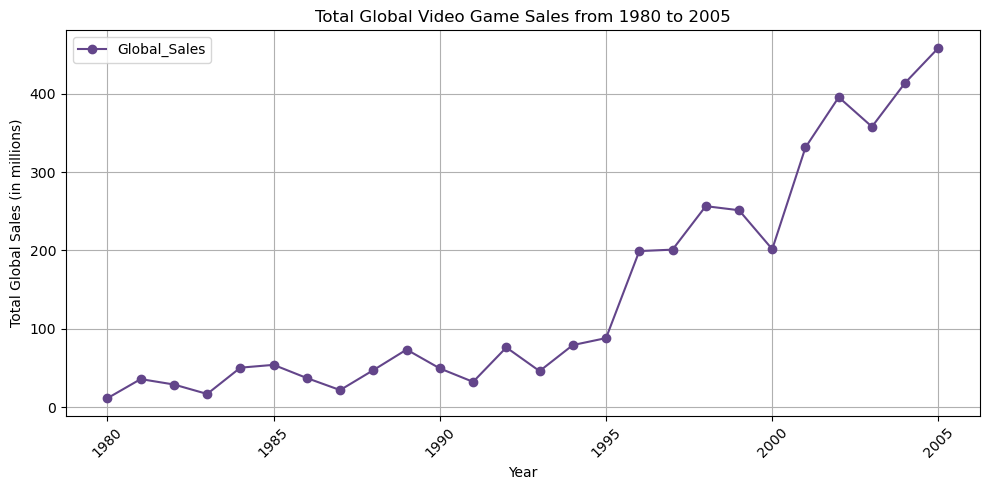

In [167]:
# Line Chart for Global Sales By Year

plt.figure(figsize=(10, 5))  
plt.plot(filtered_sales['Year'], filtered_sales['Global_Sales'], marker='o', color ='#63458A', label='Global_Sales')
plt.title(f'Total Global Video Game Sales from {start_year} to {end_year}')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.legend()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [168]:
# Filter for a specific range of years
start_year = 1980
end_year = 2005
filtered_sales = total_platform_year[(total_platform_year['Year'] >= start_year) & (total_platform_year['Year'] <= end_year)]

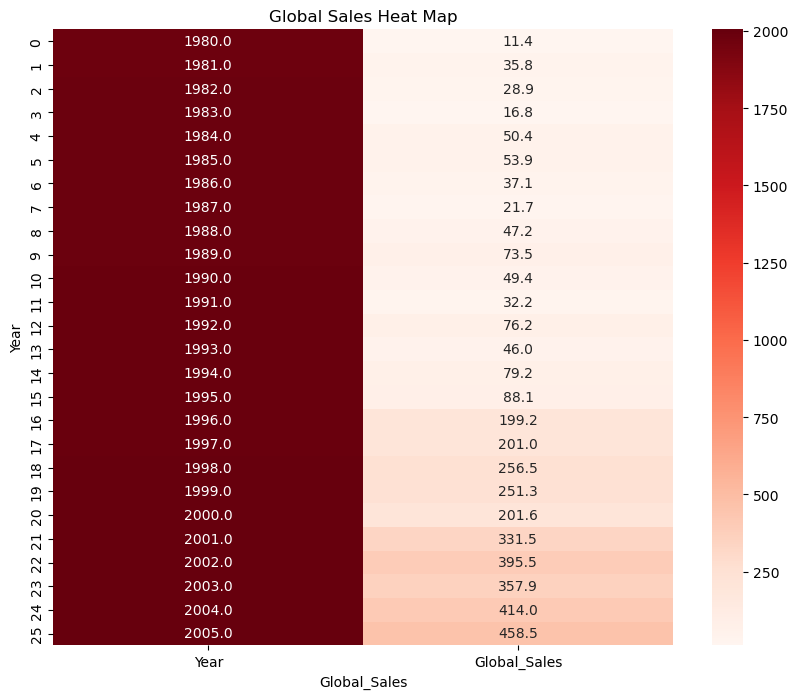

In [187]:
# Heat map

custom_palette = sns.color_palette(["#63458A", "#297373"])
plt.figure(figsize=(10, 8)),(filtered_sales['Year'], filtered_sales['Global_Sales'])
sns.heatmap(filtered_sales, annot=True, fmt=".1f", cmap="Reds")
plt.title('Global Sales Heat Map')
plt.xlabel('Global_Sales')
plt.ylabel('Year')
plt.show()